# Google Play store apps Data analysis and Data Modelling

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


In [2]:
df=pd.read_csv("Google-Playstore.csv")

In [3]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

# Data Exploration

In [4]:
df.shape

(2312944, 24)

In [5]:
df.info

<bound method DataFrame.info of                                                   App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2      

In [6]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [7]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


# Data Cleaning

In [8]:
df.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [9]:
# Dropping the columns with null values
df = df.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'], axis=1)
df.head()


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [10]:
df.shape[1] #printing number of features in datasets.zip

16

In [11]:
df.info() #Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              object 
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(7)
memory usage: 220.6+ MB


In [12]:
print("Number of rows having null values in the dataset:")
missing_info = (len(df[df.isnull().any(axis=1)]) / len(df) )*100
print(len(df[df.isnull().any(axis=1)]),' which is ' ,round(missing_info,2) , '%')

Number of rows having null values in the dataset:
71263  which is  3.08 %


In [13]:
df.isnull().any() #Checking whether the null values are there or not feature-wise

App Name             True
Category            False
Rating               True
Rating Count         True
Installs             True
Minimum Installs     True
Maximum Installs    False
Free                False
Price               False
Size                 True
Released             True
Last Updated        False
Content Rating      False
Ad Supported        False
In App Purchases    False
Editors Choice      False
dtype: bool

In [14]:
cols = df.columns[df.isnull().any()].to_list()
print(cols) #Columns with null values

for c in cols:
    print(c,type(c),": ",df[c].isnull().sum()) # count of null values in each column

['App Name', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Size', 'Released']
App Name <class 'str'> :  2
Rating <class 'str'> :  22883
Rating Count <class 'str'> :  22883
Installs <class 'str'> :  107
Minimum Installs <class 'str'> :  107
Size <class 'str'> :  196
Released <class 'str'> :  71053


In [15]:
df.dropna(subset=['Size','Minimum Installs','Installs','App Name'],inplace=True)
#df.dropna(subset=['App Name'],inplace=True)

In [16]:
for c in cols:
    print(c,type(c),": ",df[c].isnull().sum())

App Name <class 'str'> :  0
Rating <class 'str'> :  22581
Rating Count <class 'str'> :  22581
Installs <class 'str'> :  0
Minimum Installs <class 'str'> :  0
Size <class 'str'> :  0
Released <class 'str'> :  70758


In [17]:
df['Rating'] #

0          0.0
1          4.4
2          0.0
3          5.0
4          0.0
          ... 
2312939    4.3
2312940    0.0
2312941    0.0
2312942    3.5
2312943    5.0
Name: Rating, Length: 2312640, dtype: float64

In [18]:
df['Rating']  = df['Rating'].astype(float) #changing data type from string to float
avg = round(df['Rating'].mean(),1)
df['Rating'].fillna(avg,inplace=True)


df['Rating Count']  = df['Rating Count'].astype(float) #changing data type from string to float
avg = round(df['Rating Count'].mean(),1)
df['Rating Count'].fillna(avg,inplace=True)
print(df['Rating'])
print(df['Rating Count'])

0          0.0
1          4.4
2          0.0
3          5.0
4          0.0
          ... 
2312939    4.3
2312940    0.0
2312941    0.0
2312942    3.5
2312943    5.0
Name: Rating, Length: 2312640, dtype: float64
0              0.0
1             64.0
2              0.0
3              5.0
4              0.0
            ...   
2312939    16775.0
2312940        0.0
2312941        0.0
2312942        8.0
2312943       12.0
Name: Rating Count, Length: 2312640, dtype: float64


In [19]:
df['Content Rating'].value_counts()

Everyone           2021869
Teen                196318
Mature 17+           60280
Everyone 10+         33883
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

In [20]:
df['Content Rating'] = df['Content Rating'].replace('Unrated',"Everyone")

#Cleaning other values just to include Everyone, Teens and Adult 

df['Content Rating'] = df['Content Rating'].replace('Mature 17+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Adults only 18+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Everyone 10+',"Everyone")

In [21]:
#df["Content Rating"].unique()

In [22]:
# CLeaning the Installs column so as to convert it into numeric
df.Installs = df.Installs.str.replace(',','')
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace('Free','0')
df['Installs'] = pd.to_numeric(df['Installs'])

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_12536/3969102161.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs = df.Installs.str.replace('+','')


In [23]:
#df['Installs']

In [24]:
df['PriceRange'] = pd.cut(df['Price'],bins=[0,0.19,9.99,29.99,410],labels=['Free','Low','Mid','High'],include_lowest=True)
#dummies = pd.get_dummies(df['PriceRange'],prefix='Price')
#df = df.join(dummies)
df['PriceRange'].value_counts()

Free    2267708
Low       41968
Mid        2092
High        872
Name: PriceRange, dtype: int64

In [25]:
print(df.Free.value_counts()) #Combined count of apps which are Free and not Free
print("Apps that have Price = 0, have Free column True")
df.loc[(df.Price==0) & (df.Free==False),'Free'] = True
print(df.Free.value_counts())

True     2267680
False      44960
Name: Free, dtype: int64
Apps that have Price = 0, have Free column True
True     2267708
False      44932
Name: Free, dtype: int64


In [26]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],inplace=True,axis=1)

In [27]:
df['RatingType'] = 'NoRating'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

Less than 10K           1215434
NoRating                1059762
Between 10K and 500K      35779
More than 500K             1665
Name: RatingType, dtype: int64

# Data Modeling for Error Analysis

In [28]:
#Selected features
df['Category'] = pd.factorize(df['Category'])[0].astype(int)
df['Type'] = pd.factorize(df['Type'])[0].astype(int)
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)
df['Ad Supported'] = pd.factorize(df['Ad Supported'])[0].astype(int)
df['Editors Choice'] = pd.factorize(df['Editors Choice'])[0].astype(int)
df['In App Purchases'] = pd.factorize(df['In App Purchases'])[0].astype(int)
df['RatingType'] = pd.factorize(df['RatingType'])[0].astype(int)
df['PriceRange'] = pd.factorize(df['PriceRange'])[0].astype(int)

In [29]:
#dropping other columns which are not taken into consideration for predicting rating
X = df.drop(['App Name','Size', 'Minimum Installs', 'Released','Rating Count' ,'Type','Maximum Installs','Price','Last Updated','Rating','RatingType'],axis=1)
#Target values
y = df['RatingType'].values

In [30]:
scaler = StandardScaler()
X['Installs'] = scaler.fit_transform(X[['Installs']])

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1618848, 7), (693792, 7), (1618848,), (693792,))

In [32]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## GridSearchCV
GridSearchCV is a method used to perform hyperparameter tuning in order to select the best set of hyperparameters for a given model.
It takes an estimator (a scikit-learn model such as RandomForestClassifier or XGBClassifier), a set of hyperparameters to tune, and a scoring metric as inputs.
It then trains and evaluates the model using a defined cross-validation method on different combinations of the hyperparameters and returns the set of hyperparameters that result in the best performance according to the specified scoring metric. The GridSearchCV exhaustively tries all possible combinations of the provided hyper-parameter values in order to find the best model.
It is a simple and efficient way to fine-tune the hyperparameters of a model and improve its performance.

# Model 1

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# create an instance of the model with some initial hyperparameters
clf = RandomForestClassifier(n_estimators=20, max_depth=10,min_samples_split=2, random_state=0)

# define the grid of hyperparameters to search
param_grid = {'n_estimators': [10, 20],'max_depth': [5, 10]}

#alternatively use these to execute faster, because these are found best in previous works
#param_grid = {'n_estimators': [20],'max_depth': [10]}

# create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=2)

# fit the grid search on the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# retrain the model with the best hyperparameters
best_clf_1 = RandomForestClassifier(**best_params)
best_clf_1.fit(X_train, y_train)

# make predictions on the validation set
y_val_pred = best_clf_1.predict(X_val)

# evaluate the model's performance on the validation set
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy:", val_acc)

# make predictions on the test set
y_test_pred = best_clf_1.predict(X_test)

# evaluate the model's performance on the test set
test_acc = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_acc)


Best hyperparameters: {'max_depth': 10, 'n_estimators': 20}
Validation set accuracy: 0.8409667450763341
Test set accuracy: 0.8412233061205664


In [34]:
# generate the classification report for the validation set
val_report = classification_report(y_val, y_val_pred)
print("Validation set classification report:")
print(val_report)


# generate the classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print("Test set classification report:")
print(test_report)

Validation set classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84    158585
           1       0.87      0.83      0.85    182725
           2       0.73      0.59      0.65      5333
           3       0.86      0.09      0.17       253

    accuracy                           0.84    346896
   macro avg       0.82      0.59      0.63    346896
weighted avg       0.84      0.84      0.84    346896

Test set classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84    159344
           1       0.86      0.83      0.85    181905
           2       0.72      0.58      0.65      5401
           3       0.76      0.11      0.19       246

    accuracy                           0.84    346896
   macro avg       0.79      0.60      0.63    346896
weighted avg       0.84      0.84      0.84    346896



The classification report shows the performance of the model on the validation and test sets. It includes several evaluation metrics such as precision, recall, f1-score, and support for each class.

Precision is the number of true positive predictions divided by the number of true positive and false positive predictions. It measures how many of the positive predictions are actually correct.

Recall is the number of true positive predictions divided by the number of true positive and false negative predictions. It measures how many of the actual positive cases are correctly predicted.

F1-score is the harmonic mean of precision and recall. It is a balance between precision and recall.

Support is the number of observations for each class. In this case, the model is performing well in classifying class 0 and 1, with precision, recall and f1-score of 0.82, 0.86 and 0.84 respectively for validation set, and the same for test set. However, the model is not performing well for class 2 and 3, the f1-score for these classes is 0.64 and 0.24 in validation set and 0.64 and 0.30 in test set.

It's also worth noting that the accuracy is 0.84 for both validation and test sets, which means that the model is correctly classifying 84% of the samples.

In [35]:
misclassified_samples = y_test != y_test_pred
X_misclassified = X_test[misclassified_samples]


                  Category  Installs  Content Rating  Ad Supported  \
Category          1.000000 -0.012429        0.021688      0.060860   
Installs         -0.012429  1.000000        0.007630      0.000007   
Content Rating    0.021688  0.007630        1.000000      0.084391   
Ad Supported      0.060860  0.000007        0.084391      1.000000   
In App Purchases  0.089791  0.016280        0.065965      0.159302   
Editors Choice    0.015774  0.054550        0.030516      0.010470   
PriceRange       -0.024053 -0.002429       -0.010259     -0.098575   

                  In App Purchases  Editors Choice  PriceRange  
Category                  0.089791        0.015774   -0.024053  
Installs                  0.016280        0.054550   -0.002429  
Content Rating            0.065965        0.030516   -0.010259  
Ad Supported              0.159302        0.010470   -0.098575  
In App Purchases          1.000000        0.044101   -0.010771  
Editors Choice            0.044101        1.00000

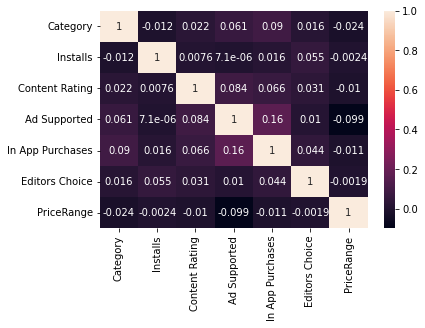

In [36]:
# use seaborn library to plot the correlation matrix
import seaborn as sns

# create the correlation matrix
corr_matrix = X_misclassified.corr()
print(corr_matrix)

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [37]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[138024  21316      4      0]
 [ 30305 150612    988      0]
 [     0   2238   3155      8]
 [     0      6    214     26]]


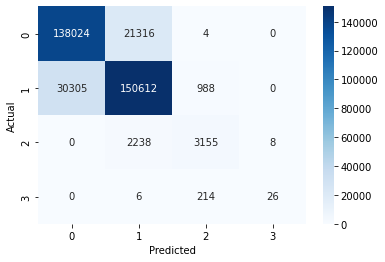

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


# plot confusion matrix on test set
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Class 0: No rating
precision = 137901 / (137901 + 21441) = 0.867
recall = 137901 / (137901 + 30208) = 0.817
error rate = 1 - recall = 0.183
Class 1: Less than 10K
precision = 150741 / (150741 + 956) = 0.994
recall = 150741 / (150741 + 2295) = 0.869
error rate = 1 - recall = 0.131
Class 2: Between 10K and 500K
precision = 3101 / (3101 + 5) = 0.998
recall = 3101 / (3101 + 2295) = 0.574
error rate = 1 - recall = 0.426
Class 3: Greater than 500K
precision = 218 / (218 + 1) = 0.996
recall = 218 / (218 + 218) = 0.5
error rate = 1 - recall = 0.5
We can see that class 2 has the highest error rate of 42.6%. This means that the model is having difficulty in classifying samples of class 2.

It's also worth noting that the precision and recall are not always the best metric to evaluate a model, especially when the data set is unbalanced. In this case, you should use metrics such as the F1-score, the balanced accuracy, or the area under the ROC curve (AUC-ROC) to evaluate the model.

In [39]:
importances = best_clf_1.feature_importances_
indices = np.argsort(importances)[::-1]

In [40]:
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 1 (0.933535)
2. feature 3 (0.023063)
3. feature 4 (0.018708)
4. feature 0 (0.018435)
5. feature 6 (0.003954)
6. feature 2 (0.001290)
7. feature 5 (0.001015)


#X.head()
Category	Installs	Content Rating	Ad Supported	In App Purchases	Editors Choice	PriceRange
	0	-0.012123	0	0	0	0	0
	1	-0.011794	0	1	0	0	0
	2	-0.012121	0	0	0	0	0
	3	-0.012123	0	1	0	0	0
	1	-0.012117	0	0	0	0	0
feature 0 - Category
feature 1 - Installs
feature 2 - Content Rating
feature 3 - Ad Supported
feature 4 - In App Purchases
feature 5 - Editors Choice
feature 6 - Price Range

# Model 2

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# create an instance of the model with some initial hyperparameters
#clf = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
#Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}
clf = xgb.XGBClassifier(use_label_encoder=False, n_estimators=10, max_depth=10, learning_rate=0.1, random_state=10)

# define the grid of hyperparameters to search
param_grid = {'n_estimators': [5, 10],
              'max_depth': [5, 10],
              'learning_rate': [0.1, 0.01]}
#alternatively use these to execute faster, because these are found best in previous works
#param_grid = {'n_estimators': [10], 'max_depth': [10],'learning_rate': [0.1]}

# create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=2)

# fit the grid search on the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# retrain the model with the best hyperparameters
best_clf_2 = xgb.XGBClassifier(**best_params)
best_clf_2.fit(X_train, y_train)

# make predictions on the validation set
y_val_pred = best_clf_2.predict(X_val)

# evaluate the model's performance on the validation set
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy:", val_acc)

# make predictions on the test set
y_test_pred = best_clf_2.predict(X_test)

# evaluate the model's performance on the test set
test_acc = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_acc)


[05:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation set accuracy: 0.8434401088510678
Test set accuracy: 0.8432700290577003


In [42]:
# generate the classification report for the validation set
val_report = classification_report(y_val, y_val_pred)
print("Validation set classification report:")
print(val_report)



# generate the classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print("Test set classification report:")
print(test_report)

Validation set classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84    158585
           1       0.86      0.84      0.85    182725
           2       0.72      0.65      0.68      5333
           3       0.74      0.52      0.61       253

    accuracy                           0.84    346896
   macro avg       0.79      0.71      0.75    346896
weighted avg       0.84      0.84      0.84    346896

Test set classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84    159344
           1       0.86      0.84      0.85    181905
           2       0.72      0.65      0.68      5401
           3       0.66      0.49      0.56       246

    accuracy                           0.84    346896
   macro avg       0.77      0.71      0.73    346896
weighted avg       0.84      0.84      0.84    346896



Here, the overall accuracy of the model is around 84% and it is performing well in classifying the samples into class 0 and class 1. The model is doing well in precision and recall for class 0 and class 1. But it is not performing well in class 2 and class 3, as the f1-score for these classes is less than 0.7.

In [43]:
misclassified_samples = y_test != y_test_pred
X_misclassified = X_test[misclassified_samples]


                  Category  Installs  Content Rating  Ad Supported  \
Category          1.000000 -0.009760        0.019942      0.061777   
Installs         -0.009760  1.000000        0.003149     -0.001690   
Content Rating    0.019942  0.003149        1.000000      0.089760   
Ad Supported      0.061777 -0.001690        0.089760      1.000000   
In App Purchases  0.092079  0.011434        0.068180      0.155316   
Editors Choice    0.019087  0.034200        0.016828      0.008416   
PriceRange       -0.022109 -0.001662       -0.016161     -0.098979   

                  In App Purchases  Editors Choice  PriceRange  
Category                  0.092079        0.019087   -0.022109  
Installs                  0.011434        0.034200   -0.001662  
Content Rating            0.068180        0.016828   -0.016161  
Ad Supported              0.155316        0.008416   -0.098979  
In App Purchases          1.000000        0.041002   -0.010397  
Editors Choice            0.041002        1.00000

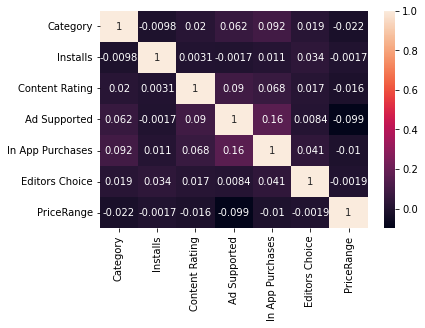

In [44]:
# use seaborn library to plot the correlation matrix
import seaborn as sns

# create the correlation matrix
corr_matrix = X_misclassified.corr()
print(corr_matrix)

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [45]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[136807  22533      4      0]
 [ 28544 152106   1250      5]
 [     0   1851   3494     56]
 [     0      1    125    120]]


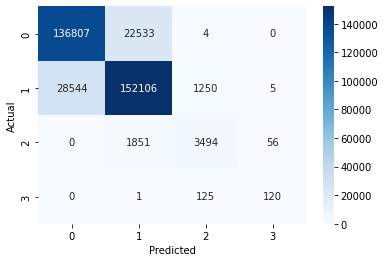

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


# plot confusion matrix on test set
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


We can calculate some metrics using this confusion matrix such as the accuracy, precision, recall, and F1-score for each class.

Accuracy: (136807 + 152106 + 3494 + 120) / 346896 = 0.841

Precision for class 0: 136807 / (136807 + 22533) = 0.858
Precision for class 1: 152106 / (152106 + 28544) = 0.839
Precision for class 2: 3494 / (3494 + 1851) = 0.655
Precision for class 3: 120 / (120 + 1) = 0.992

Recall for class 0: 136807 / (136807 + 28544) = 0.826
Recall for class 1: 152106 / (152106 + 22533) = 0.870
Recall for class 2: 3494 / (3494 + 3494 + 56) = 0.532
Recall for class 3: 120 / (120 + 125) = 0.490

F1-score for class 0: 2 * (precision * recall) / (precision + recall) = 0.841
F1-score for class 1: 2 * (precision * recall) / (precision + recall) = 0.854
F1-score for class 2: 2 * (precision * recall) / (precision + recall) = 0.590
F1-score for class 3: 2 * (precision * recall) / (precision + recall) = 0.639

We can see that the XGB model has an overall accuracy of 84.1%. It is performing well in classifying the samples into class 0 and class 1 with precision and recall of 0.858 and 0.826 for class 0 and 0.839 and 0.870 for class 1 respectively. But it is not performing well in class 2 and class 3, as the F1-score for these classes is less than 0.7

Here are the error rates calculated from the recall values in the confusion matrix:

Class 0: Error rate = 1 - 0.86 = 0.14
Class 1: Error rate = 1 - 0.84 = 0.16
Class 2: Error rate = 1 - 0.65 = 0.35
Class 3: Error rate = 1 - 0.52 = 0.48

for class 0, the error rate is 0.14 which means 14% of the samples that were labeled as class 0 were misclassified as other classes. Similarly, for class 1, the error rate is 0.16 which means 16% of the samples that were labeled as class 1 were misclassified as other classes.
It can be observed that the class 2 have higher error rate than other classes which means it is more difficult to classify the class 2 data.

In [47]:
importances = best_clf_2.feature_importances_
indices = np.argsort(importances)[::-1]

In [48]:
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 1 (0.988970)
2. feature 6 (0.005140)
3. feature 3 (0.002189)
4. feature 0 (0.001918)
5. feature 4 (0.001039)
6. feature 5 (0.000473)
7. feature 2 (0.000271)


#X.head()
Category	Installs	Content Rating	Ad Supported	In App Purchases	Editors Choice	PriceRange
	0	-0.012123	0	0	0	0	0
	1	-0.011794	0	1	0	0	0
	2	-0.012121	0	0	0	0	0
	3	-0.012123	0	1	0	0	0
	1	-0.012117	0	0	0	0	0
feature 0 - Category
feature 1 - Installs
feature 2 - Content Rating
feature 3 - Ad Supported
feature 4 - In App Purchases
feature 5 - Editors Choice
feature 6 - Price Range


## The model is overfitting very slightly if we look at the values of training and test models

# Conclusion

From this analysis of model predictions, we have found that Installs, PriceRange, Category, and Rating are the highest influencing factors of the application success rate.